In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:\Data\Jupyter_file\统计建模')

In [29]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [30]:
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [31]:
#读取数据
data_raw = pd.read_excel('LR_practice.xlsx')
data_raw.head()

,id,Acc,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edad2,edu_class
0,19,1,1217.03,Male,40,16.03515,1,1,99.93,15.932789,1600,研究生
1,5,1,1251.50,Male,32,15.84750,1,0,49.88,15.796316,1024,大学
2,86,1,856.57,Male,41,11.47285,1,0,16.10,11.275632,1681,研究生
3,50,1,1321.83,Male,28,13.40915,1,0,100.39,13.346474,784,大学
4,67,1,816.03,Male,41,10.03015,0,1,119.76,10.332263,1681,研究生


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               76 non-null     int64  
 1   Acc              76 non-null     int64  
 2   avg_exp          70 non-null     float64
 3   gender           76 non-null     object 
 4   Age              76 non-null     int64  
 5   Income           76 non-null     float64
 6   Ownrent          76 non-null     int64  
 7   Selfempl         76 non-null     int64  
 8   dist_home_val    76 non-null     float64
 9   dist_avg_income  76 non-null     float64
 10  edad2            76 non-null     int64  
 11  edu_class        75 non-null     object 
dtypes: float64(4), int64(6), object(2)
memory usage: 7.2+ KB


In [32]:
#变量'id','Acc','edad2'无用
data_raw.drop(['id','Acc','edad2'], axis=1, inplace=True)

In [33]:
#删除重复值
data_raw.drop_duplicates(inplace=True)
data_raw.duplicated().sum()
data_raw.duplicated().mean()

0

0.0

In [34]:
# 填补缺失值
#avg_exp
data_raw['avg_exp'].fillna(data_raw['avg_exp'].mean(), inplace=True)

In [35]:
# 数据编码
#方法1：gender
data_raw['gender'].replace({'Male':1, 'Female':0},inplace=True)
data_raw.head()

,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edu_class
0,1217.03,1,40,16.03515,1,1,99.93,15.932789,研究生
1,1251.50,1,32,15.84750,1,0,49.88,15.796316,大学
2,856.57,1,41,11.47285,1,0,16.10,11.275632,研究生
3,1321.83,1,28,13.40915,1,0,100.39,13.346474,大学
4,816.03,1,41,10.03015,0,1,119.76,10.332263,研究生


In [36]:
label = data_raw['edu_class'].unique().tolist()
#对原数据进行编码
data_raw['edu_class'] = data_raw['edu_class'].apply(lambda x: label.index(x))

In [37]:
# 3倍标准差
from scipy import stats
#标准化数据(Age)
z = stats.zscore(data_raw['Age'])
#寻找异常数据的索引
z[(z>3)|(z<-3)]
#查看异常数据的值
data_raw['Age'].iloc[40]

40    8.643062
Name: Age, dtype: float64

999

In [38]:
#将异常值使用除异常值之外的数据的均值进行填补
data_raw['Age'].iloc[40] = data_raw['Age'].drop(index=40).mean()

In [12]:
data_raw.head()

,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edu_class
0,1217.03,1,40.0,16.03515,1,1,99.93,15.932789,0
1,1251.50,1,32.0,15.84750,1,0,49.88,15.796316,1
2,856.57,1,41.0,11.47285,1,0,16.10,11.275632,0
3,1321.83,1,28.0,13.40915,1,0,100.39,13.346474,1
4,816.03,1,41.0,10.03015,0,1,119.76,10.332263,0


In [39]:
# 哑变量转换
#edu_class哑变量转换
dummy = pd.get_dummies(data_raw['edu_class'], prefix='edu', drop_first=True)
data = data_raw.join(dummy)
data.head()

,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edu_class,edu_1,edu_2,edu_3,edu_4
0,1217.03,1,40.0,16.03515,1,1,99.93,15.932789,0,0,0,0,0
1,1251.50,1,32.0,15.84750,1,0,49.88,15.796316,1,1,0,0,0
2,856.57,1,41.0,11.47285,1,0,16.10,11.275632,0,0,0,0,0
3,1321.83,1,28.0,13.40915,1,0,100.39,13.346474,1,1,0,0,0
4,816.03,1,41.0,10.03015,0,1,119.76,10.332263,0,0,0,0,0


In [40]:
data2 = data.drop('edu_class',axis=1)
data2.head()

,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edu_1,edu_2,edu_3,edu_4
0,1217.03,1,40.0,16.03515,1,1,99.93,15.932789,0,0,0,0
1,1251.50,1,32.0,15.84750,1,0,49.88,15.796316,1,0,0,0
2,856.57,1,41.0,11.47285,1,0,16.10,11.275632,0,0,0,0
3,1321.83,1,28.0,13.40915,1,0,100.39,13.346474,1,0,0,0
4,816.03,1,41.0,10.03015,0,1,119.76,10.332263,0,0,0,0


In [24]:
# 相关分析
data.corr()
#分类变量与连续变量的相关系数计算：肯德尔相关系数
data[['avg_exp', 'gender', 'Ownrent', 'Selfempl', 'edu_class']].corr(method='kendall')
#分类变量与分类变量的相关系数计算：斯皮尔曼相关系数
data[['gender', 'Ownrent', 'Selfempl', 'edu_class']].corr(method='spearman')

,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edu_class,edu_1,edu_2,edu_3,edu_4
avg_exp,1.000000e+00,0.203600,2.550378e-01,0.618998,0.296467,0.007544,0.299324,0.639808,-0.652473,-0.016009,-0.517608,-0.193775,-8.151683e-17
gender,2.035997e-01,1.000000,3.337694e-01,0.719685,0.430469,0.046657,0.190720,0.705310,-0.373224,0.126663,-0.291216,-0.158590,-6.900656e-02
Age,2.550378e-01,0.333769,1.000000e+00,0.320587,0.435519,0.097696,0.095233,0.310345,-0.305149,-0.020194,-0.258898,-0.061522,-4.190919e-17
Income,6.189981e-01,0.719685,3.205873e-01,1.000000,0.532525,-0.073450,0.271646,0.990413,-0.626842,0.033885,-0.356766,-0.300040,-1.535058e-01
Ownrent,2.964665e-01,0.430469,4.355194e-01,0.532525,1.000000,-0.115370,0.059849,0.512273,-0.328597,0.049609,-0.168620,-0.196988,-8.571429e-02
Selfempl,7.544430e-03,0.046657,9.769642e-02,-0.073450,-0.115370,1.000000,0.052527,-0.119567,0.236433,-0.192865,-0.101123,0.315952,3.944053e-01
dist_home_val,2.993244e-01,0.190720,9.523328e-02,0.271646,0.059849,0.052527,1.000000,0.286791,-0.311106,0.226996,-0.307158,-0.249559,1.443979e-01
dist_avg_income,6.398076e-01,0.705310,3.103451e-01,0.990413,0.512273,-0.119567,0.286791,1.000000,-0.648087,0.055505,-0.350248,-0.332764,-1.809021e-01
edu_class,-6.524726e-01,-0.373224,-3.051493e-01,-0.626842,-0.328597,0.236433,-0.311106,-0.648087,1.000000,-0.141865,0.565414,0.485764,3.294850e-01
edu_1,-1.600887e-02,0.126663,-2.019449e-02,0.033885,0.049609,-0.192865,0.226996,0.055505,-0.141865,1.000000,-0.461223,-0.174816,-7.606684e-02


,avg_exp,gender,Ownrent,Selfempl,edu_class
avg_exp,1.000000,0.167236,0.290705,0.064150,-0.561243
gender,0.167236,1.000000,0.430469,0.046657,-0.351901
Ownrent,0.290705,0.430469,1.000000,-0.115370,-0.300133
Selfempl,0.064150,0.046657,-0.115370,1.000000,0.154962
edu_class,-0.561243,-0.351901,-0.300133,0.154962,1.000000


,gender,Ownrent,Selfempl,edu_class
gender,1.000000,0.430469,0.046657,-0.380756
Ownrent,0.430469,1.000000,-0.115370,-0.324743
Selfempl,0.046657,-0.115370,1.000000,0.167669
edu_class,-0.380756,-0.324743,0.167669,1.000000


<AxesSubplot: >

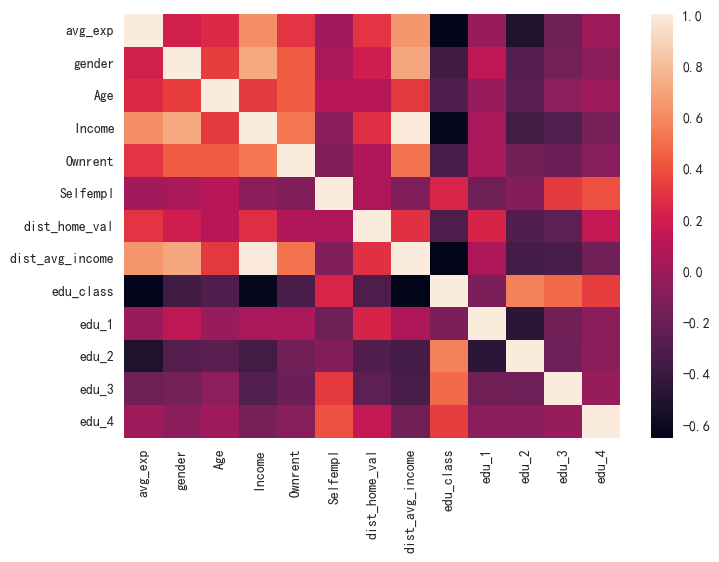

In [25]:
sns.heatmap(data.corr())

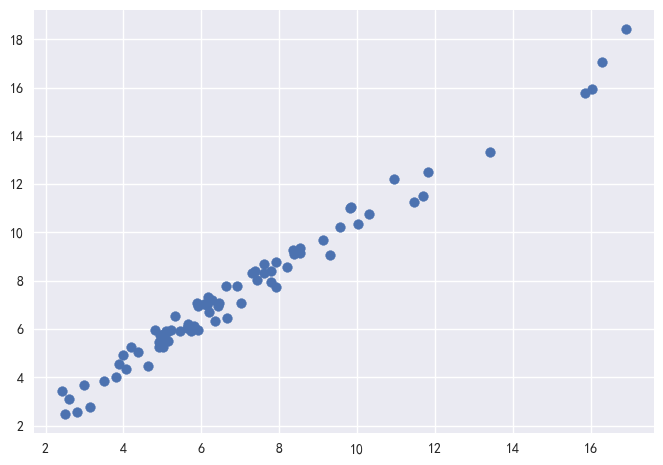

In [26]:
plt.scatter(data['Income'],data['dist_avg_income'])

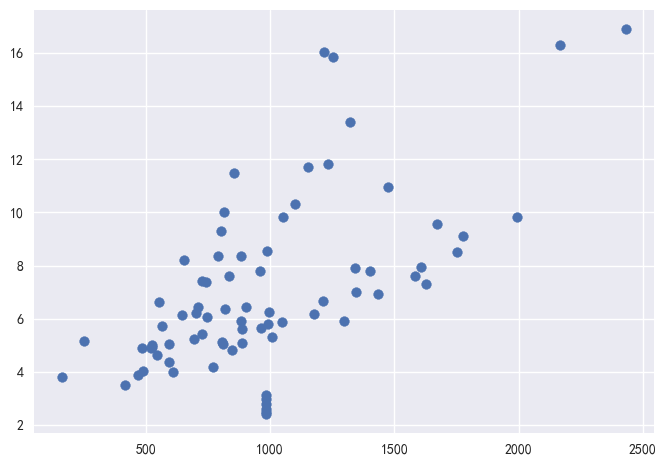

In [28]:
plt.scatter(data['avg_exp'],data['Income'])

In [29]:
data2.columns

Index(['avg_exp', 'gender', 'Age', 'Income', 'Ownrent', 'Selfempl',
       'dist_home_val', 'dist_avg_income', 'edu_1', 'edu_2', 'edu_3', 'edu_4'],
      dtype='object')

In [41]:
#建立模型过程
formula = 'avg_exp~gender+Age+Income+Ownrent+Selfempl+dist_home_val+dist_avg_income+edu_1+edu_2+edu_3+edu_4'
model = smf.ols(formula,data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     14.93
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           8.36e-14
Time:                        16:27:29   Log-Likelihood:                -519.52
No. Observations:                  76   AIC:                             1063.
Df Residuals:                      64   BIC:                             1091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         535.9565    223.038      2.403      0.019      90.387     981.526
gender           -447.4828     97.100     -4.608      0.000    -641.463    -253.503
Age                 0.6121      4.779      0.128      0.898      -8.936      10.160
Income           -119.1929     72.411     -1.646      0.105    -263.850      25.464
Ownrent            41.3184     76.416      0.541      0.591    -111.341     193.977
Selfempl          153.7000    129.424      1.188      0.239    -104.853     412.253
dist_home_val       0.1579      0.859      0.184      0.855      -1.557       1.873
dist_avg_income   211.5250     71.122      2.974      0.004      69.442     353.608
edu_1            -262.5083     82.890     -3.167      0.002    -428.100     -96.916
edu_2            -495.1400     92.266     -5.366      0.000    -679.462    -310.818
edu_3            -292.5211    156.617     -1.868      0.066    -605.400      20.358
edu_4              49.3783    294.618      0.168      0.867    -539.188     637.945
==============================================================================
Omnibus:                        0.894   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.613
Skew:                          -0.219   Prob(JB):                        0.736
Kurtosis:                       3.044   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# vif时，需手动添加截距项
#手动去除因变量
#手动添加截距项
data_vif = data.drop(['avg_exp'], axis=1)
data_vif['Inter'] = 1  #相当于添加了截距项
data_vif.drop(['edu_1', 'edu_2', 'edu_3', 'edu_4'], axis=1, inplace=True)

In [17]:
#计算每个变量的VIF值 1-3正常，3-10岭回归处理，>10建议删除
for i in range(0,data_vif.shape[1]):
    print(data_vif.columns[i], vif(data_vif,i))

gender 2.2091919746839945
Age 1.3708810657506336
Income 64.76239230667133
Ownrent 1.668281771649641
Selfempl 1.2887640187408766
dist_home_val 1.1654312430431528
dist_avg_income 64.13992249399887
edu_class 1.9945867708908807
Inter 59.346326941669986


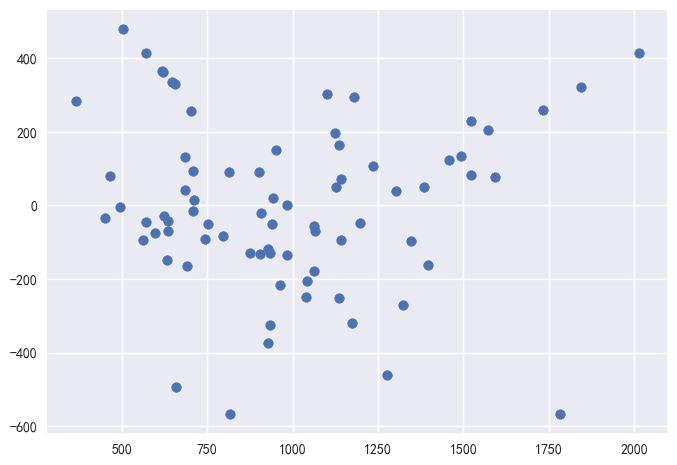

In [36]:
# 同方差 绘制残差图
# 一元回归： 横轴为自变量，纵轴为model_2.resid残差
# 多元回归： 横轴为拟合值，纵轴为残差 model_2.predict(data)   #拟合值
#残差图：如果为喇叭状就需要处理，对Y取对数，出现非正态也是对Y取对数
plt.scatter(model.predict(data), model.resid)

In [42]:
#去掉共线性高的变量
data2.drop('Income', axis=1, inplace=True)

In [43]:
#重新拟合模型
#公式
formula_2 = 'avg_exp~gender+Age+Ownrent+Selfempl+dist_home_val+dist_avg_income+edu_1+edu_2+edu_3+edu_4'
#实例化
model_2 = smf.ols(formula=formula_2, data=data2)
#拟合模型
model_2 = model_2.fit()
#输出拟合结果
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     15.74
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           7.14e-14
Time:                        16:27:40   Log-Likelihood:                -521.10
No. Observations:                  76   AIC:                             1064.
Df Residuals:                      65   BIC:                             1090.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         553.7869    225.685      2.454      0.017     103.062    1004.511
gender           -472.4592     97.160     -4.863      0.000    -666.502    -278.416
Age                 1.1111      4.832      0.230      0.819      -8.539      10.761
Ownrent            11.9649     75.277      0.159      0.874    -138.374     162.304
Selfempl          108.9822    128.194      0.850      0.398    -147.038     365.002
dist_home_val       0.2724      0.867      0.314      0.754      -1.459       2.004
dist_avg_income    97.5291     16.408      5.944      0.000      64.761     130.297
edu_1            -247.4391     83.459     -2.965      0.004    -414.119     -80.759
edu_2            -486.1425     93.307     -5.210      0.000    -672.489    -299.796
edu_3            -315.3806    158.038     -1.996      0.050    -631.005       0.244
edu_4               3.8444    297.148      0.013      0.990    -589.602     597.291
==============================================================================
Omnibus:                        1.093   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.521
Skew:                          -0.056   Prob(JB):                        0.771
Kurtosis:                       3.390   Cond. No.                         993.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

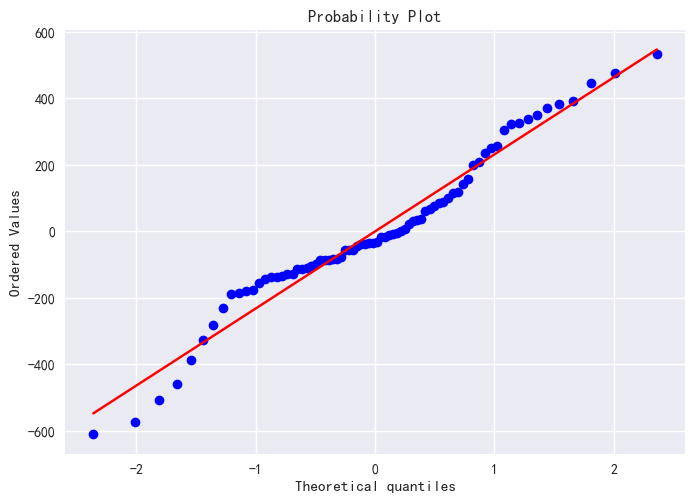

In [44]:
# 正态性
res = stats.probplot(model_2.resid, plot=plt)

In [45]:
formula_3 = 'np.log(avg_exp+1)~gender+Age+Ownrent+Selfempl+dist_home_val+dist_avg_income+edu_1+edu_2+edu_3+edu_4'
#实例化
model_3 = ols(formula=formula_3, data=data2)
#拟合模型
model_3 = model_3.fit()
#输出拟合结果
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(avg_exp + 1)   R-squared:                       0.629
Model:                             OLS   Adj. R-squared:                  0.572
Method:                  Least Squares   F-statistic:                     11.03
Date:                 Sun, 30 Apr 2023   Prob (F-statistic):           1.05e-10
Time:                         16:27:50   Log-Likelihood:                -10.091
No. Observations:                   76   AIC:                             42.18
Df Residuals:                       65   BIC:                             67.82
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.5598      0.271     24.181      0.000       6.018       7.102
gender             -0.4039      0.117     -3.458      0.001      -0.637      -0.171
Age                 0.0023      0.006      0.401      0.690      -0.009       0.014
Ownrent             0.0782      0.090      0.864      0.391      -0.103       0.259
Selfempl            0.3494      0.154      2.268      0.027       0.042       0.657
dist_home_val      -0.0006      0.001     -0.579      0.564      -0.003       0.001
dist_avg_income     0.0713      0.020      3.617      0.001       0.032       0.111
edu_1              -0.1764      0.100     -1.758      0.083      -0.377       0.024
edu_2              -0.5429      0.112     -4.841      0.000      -0.767      -0.319
edu_3              -0.7384      0.190     -3.887      0.000      -1.118      -0.359
edu_4              -0.1998      0.357     -0.559      0.578      -0.913       0.514
==============================================================================
Omnibus:                       12.586   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               22.443
Skew:                          -0.557   Prob(JB):                     1.34e-05
Kurtosis:                       5.418   Cond. No.                         993.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

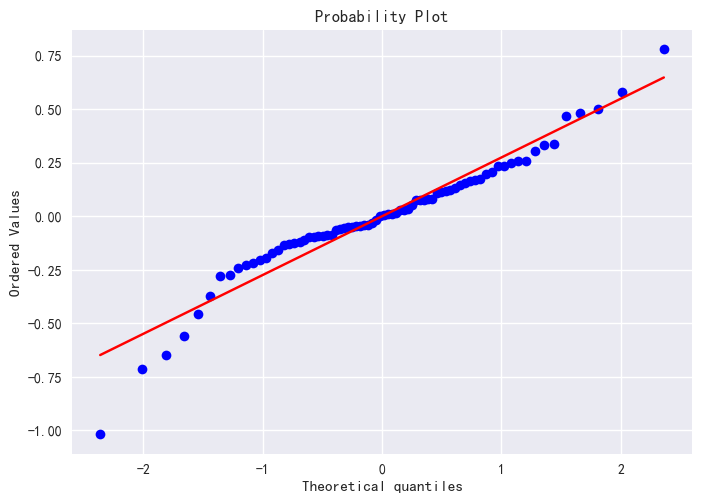

In [46]:
# 正态性
res = stats.probplot(model_3.resid, plot=plt)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
# y = data2.pop('avg_exp')
xtrain,xtest,ytrain,ytest = train_test_split(data2,data['avg_exp'],test_size=0.2)

In [48]:
lr=lr().fit(xtrain,ytrain)

In [49]:
# 回归 应用 残差平方和看模型的效果 用残差的均值MSE(残差平方和/总样本数）
# 分类 模型 可以通过 acc,AUC,recall评估
# 计算线性模型的评估指标
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,lr.predict(xtest))
mean_squared_error(ytest,model_3.predict(xtest))

4.0389678347315804e-28

911081.9302725667

In [56]:
lr.predict(xtest)

array([ 967.7467787 , 1368.25195629,  679.83721586, 1329.23059957,
        782.81055321, 1184.39420544,  804.20276199, 1229.96743375,
        905.01830827,  602.43909254,  760.5791678 , 1645.65351297,
       1414.12107331, 1441.25360286, 2146.76253274,  686.41534426])

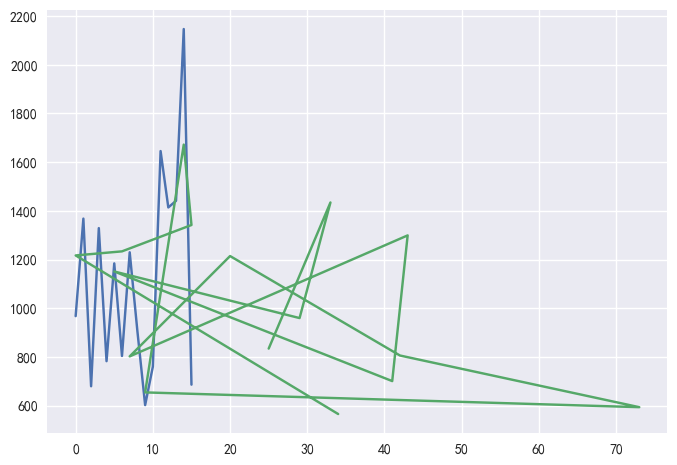

In [55]:
plt.plot(lr.predict(xtest))
plt.plot(ytest)

In [50]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(oob_score=True)
RF.fit(xtrain,ytrain)
mean_squared_error(ytest,RF.predict(xtest))

RandomForestRegressor(oob_score=True)

452.5525055040699

In [51]:
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(xtrain,ytrain)
mean_squared_error(ytest,XGB.predict(xtest))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

1286.5775314444759

In [52]:
# LightGBM
from lightgbm import LGBMRegressor
LGB = LGBMRegressor()
LGB.fit(xtrain,ytrain)
mean_squared_error(ytest,LGB.predict(xtest))

LGBMRegressor()

23115.8741568768

In [69]:
data.shape

(76, 13)

In [71]:
#精细调参
from sklearn.model_selection import GridSearchCV
param_2 = {'n_estimators':np.arange(50,200,10),
         'max_depth':np.arange(2,5,1)}
RF_2= RandomForestRegressor(oob_score=True,max_features=10)
# 以下cv是3折交叉验证
grid_RF_2 = GridSearchCV(RF_2,param_2,cv=5,n_jobs=-1)
grid_RF_2.fit(xtrain,ytrain)
mean_squared_error(ytest,grid_RF_2.predict(xtest))

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=10, oob_score=True),
             n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

68968.50314143919

In [53]:
from sklearn import tree
DT = tree.DecisionTreeRegressor()
DT.fit(xtrain,ytrain)
mean_squared_error(ytest,DT.predict(xtest))

DecisionTreeRegressor()

1581.3259937500006

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(xtrain,ytrain)
mean_squared_error(ytest,knn.predict(xtest))

KNeighborsRegressor()

910.238663777551

In [55]:
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(xtrain,ytrain)
mean_squared_error(ytest,svr.predict(xtest))

LinearSVR()

8.621985362066375e-05

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import BayesianRidge
bay = BayesianRidge(compute_score=True)
bay.fit(xtrain,ytrain)
mean_squared_error(ytest,svr.predict(xtest))

BayesianRidge(compute_score=True)

8.621985362066375e-05